In [ ]:
import requests, zipfile, io

url = "https://github.com/Sakthivel-coder12/Banana_diseases/raw/main/banana_dataset.zip"

# download + unzip in one go
r = requests.get(url)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall("banana")

# check extracted folders
import os
print(os.listdir("banana"))


['banana']


In [2]:
print(os.listdir("banana/banana"))

['disease', 'healthy']


In [3]:
img_size = (224,224)
batch_size = 32
seed = 42
dataset_dir = "banana/banana"

In [ ]:
# import zipfile

# with zipfile.ZipFile("your_folder.zip", "r") as zip_ref:
#     zip_ref.extractall("your_folder")


In [ ]:
import tensorflow as tf
import os

train_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_dir,
    validation_split = 0.30, 
    subset = "training",
    seed = seed,
    image_size  = img_size,
    batch_size = batch_size
)


temp_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_dir,
    validation_split = 0.30,
    subset = "validation",
    seed = seed,
    image_size = img_size,
    batch_size = batch_size
)
# ml --> train , test
# dl ---> train,
"""temp_ds == 30 % divide into 15% AND 15%  test and validation"""

Found 259 files belonging to 2 classes.
Using 182 files for training.
Found 259 files belonging to 2 classes.
Using 77 files for validation.


'temp_ds == 30 % divide into 15% AND 15%  test and validation'

In [22]:
len(temp_ds)

3

## split the temp_ds into testing and validation_data set

In [23]:
size = int(len(temp_ds) * 0.5)
test_ds = temp_ds.take(size)
val_ds = temp_ds.skip(size)


print(len(train_ds))
print(len(test_ds))
print(len(val_ds))

6
1
2


In [24]:
len(val_ds)

2

## let's create the CNN Model

In [25]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt



## The model defination
model = models.Sequential([               
    layers.Rescaling(1./255,input_shape = img_size + (3,)),
    layers.Conv2D(filters = 32,kernel_size = 3,activation = "relu"),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64,3,activation="relu"), 
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128,3,activation="relu"),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(128,activation = "relu"),
    layers.Dropout(0.5),
    layers.Dense(1,activation = "sigmoid")
])  

c:\Users\sakth\OneDrive\Desktop\annclassification\dl\lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [26]:
model.compile(loss = "binary_crossentropy", ## categorial_croosentropy
              optimizer = "adam", # "adam"
              metrics = ["accuracy",
                        tf.keras.metrics.Precision(name = "precision"),
                        tf.keras.metrics.Recall(name= "recall"),
                        tf.keras.metrics.AUC(name = "AUC")])


history = model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = 4,
    steps_per_epoch = len(train_ds),
    validation_steps = len(val_ds)
)

Epoch 1/4
6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 841ms/step - AUC: 0.5485 - accuracy: 0.5507 - loss: 1.1375 - precision: 0.5385 - recall: 0.6064 - val_AUC: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.6091 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 2/4
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 705ms/step - AUC: 0.6874 - accuracy: 0.5906 - loss: 0.6535 - precision: 0.6423 - recall: 0.5193 - val_AUC: 0.0000e+00 - val_accuracy: 0.6000 - val_loss: 0.6988 - val_precision: 1.0000 - val_recall: 0.6000
Epoch 3/4
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 681ms/step - AUC: 0.8199 - accuracy: 0.6798 - loss: 0.6076 - precision: 0.8302 - recall: 0.4579 - val_AUC: 0.0000e+00 - val_accuracy: 0.6000 - val_loss: 0.7552 - val_precision: 1.0000 - val_recall: 0.6000
Epoch 4/4
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 670ms/step - AUC: 0.9244 - accuracy: 0.8219 - loss: 0.4417 - precision: 0.9135 - recall: 0.6805 - val_AUC: 0.0000e+00 - val_accuracy: 0.8667 - val_loss: 0.3781 - val_precision: 1.0000 - val_recall: 0.8667


In [27]:
test_loss, test_acc, test_prec, test_rec, test_auc =model.evaluate(test_ds)
print("\n=== Test Results ===")
print(f"Accuracy : {test_acc:.4f}")
print(f"Precision: {test_prec:.4f}")
print(f"Recall : {test_rec:.4f}")
print(f"AUC : {test_auc:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step - AUC: 0.0000e+00 - accuracy: 0.9375 - loss: 0.2824 - precision: 1.0000 - recall: 0.9375

=== Test Results ===
Accuracy : 0.9375
Precision: 1.0000
Recall : 0.9375
AUC : 0.0000


Text(0, 0.5, 'Loss')

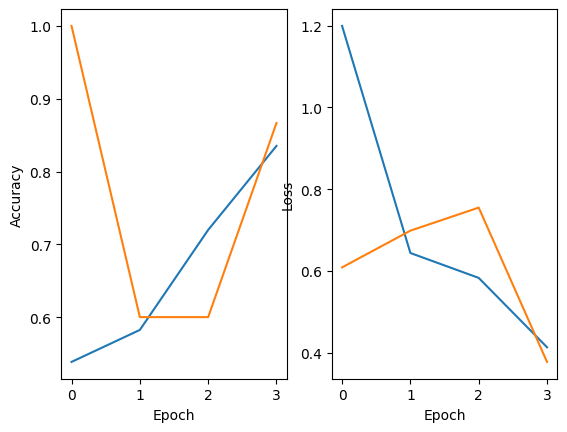

In [28]:
plt.subplot(1,2,1)
plt.plot(history.history["accuracy"],label = "train_ds")
plt.plot(history.history["val_accuracy"],label = "val_ds")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")


plt.subplot(1,2,2)
plt.plot(history.history["loss"],label = "loss")
plt.plot(history.history["val_loss"],label = "val_loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
[1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1]


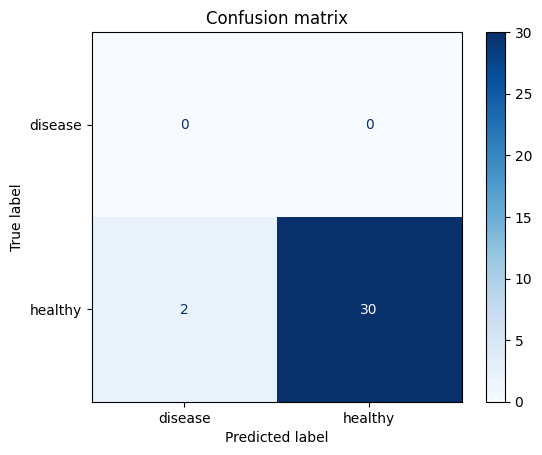

In [38]:
import numpy as np
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
y_true = np.concatenate([y for x,y in test_ds],axis = 0)
y_pred_pro = model.predict(test_ds)
y_pred = (y_pred_pro>0.5).astype("int32").flatten()
print(y_pred)
cm = confusion_matrix(y_true,y_pred)
con = ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = train_ds.class_names)
con.plot(cmap = "Blues")
plt.title("Confusion matrix")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


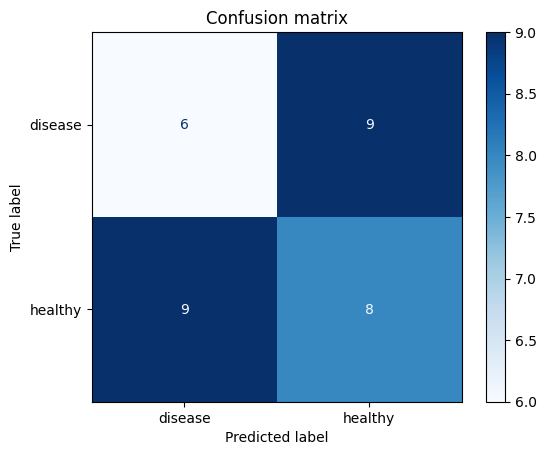

In [105]:
import numpy as np
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay


y_true = np.concatenate([y for x,y in test_ds],axis = 0)
y_pred_pro = model.predict(test_ds)
y_pred = (y_pred_pro>0.5).astype("int32").flatten()

cm = confusion_matrix(y_true,y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = train_ds.class_names)
disp.plot(cmap = "Blues")
plt.title("Confusion matrix")
plt.show()



